In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv') #menampilkan data 
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# 1. Data Understanding

In [3]:
print("data shape : ", df.shape) #menampilkan jumlah baris dan kolom data

data shape :  (205, 26)


In [4]:
df.info() #menampilkan tipe-tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe() #melihat beberapa nilai penting dari data tersebut

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


count = jumlah baris pada data,
mean = rata-rata pada data,
std = standard deviation

In [7]:
df.carbody.value_counts() #melihat banyaknya jumlah dari tiap tiap jenis carbody

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

<AxesSubplot:xlabel='carbody', ylabel='Count'>

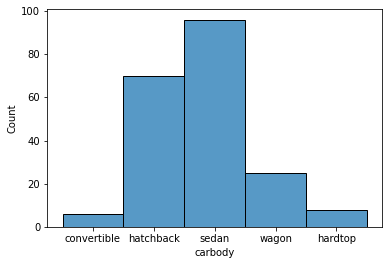

In [8]:
sns.histplot(df['carbody']) #visusalisasi terhadap atribut carbody

<AxesSubplot:xlabel='highwaympg', ylabel='Count'>

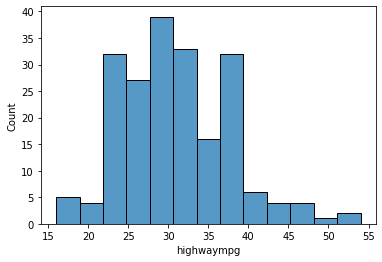

In [9]:
sns.histplot(df['highwaympg']) #visusalisasi terhadap atribut highwaympg

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

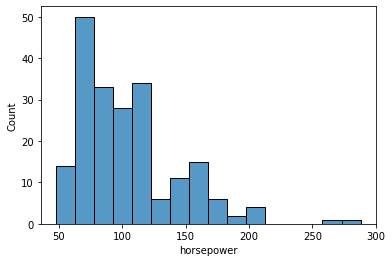

In [10]:
sns.histplot(df['horsepower']) #visusalisasi terhadap atribut horsepower

<AxesSubplot:xlabel='curbweight', ylabel='Count'>

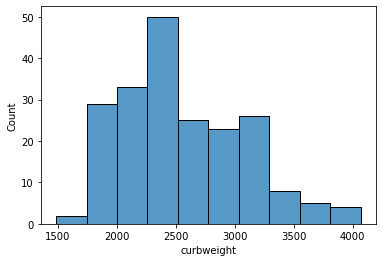

In [11]:
sns.histplot(df['curbweight']) #visusalisasi terhadap atribut curbwight

# 2. cleaning Data

In [12]:
df.isnull().sum() #mencari data yang yang belum terisi

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [13]:
df.duplicated().sum() #mencari nilai duplikasi dari data

0

# 3. EDA

<function matplotlib.pyplot.show(close=None, block=None)>

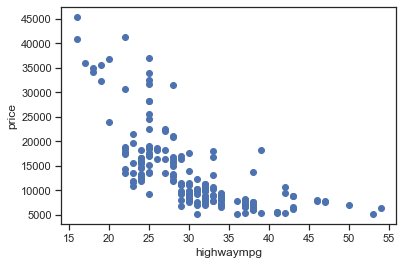

In [17]:
#menampilkan visualisasi dari atribut highwaympg dan price 

plt.scatter(df['highwaympg'], df['price'])
plt.xlabel('highwaympg')
plt.ylabel('price')
plt.show

# 4. Data Preparation

In [18]:
df.head() #menampilkan 5 teratas dari data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
df['price'] = df['price'].astype('int') #mengubah tipe data atribut price agar angka dibelakang koma hilang

In [32]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [80]:
df.drop(columns=['CarName'],inplace=True) #menghilangakn kolom carname,karena tidak akan kita pakai nantinya
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [100]:
#mengubah tipe data string pada beberapa atribut ke tipe data int dengan proses encoding

from sklearn.preprocessing import LabelEncoder #import library

label_encoder = LabelEncoder() #membuat variabel label_encoder

df['fueltype'] = label_encoder.fit_transform(df['fueltype']) #proses encoding terhadap atribut fueltype
df['aspiration'] = label_encoder.fit_transform(df['aspiration']) #proses encoding terhadap atribut aspiration
df['doornumber'] = label_encoder.fit_transform(df['doornumber']) #proses encoding terhadap atribut doornumber
df['carbody'] = label_encoder.fit_transform(df['carbody']) #proses encoding terhadap atribut carbody
df['drivewheel'] = label_encoder.fit_transform(df['drivewheel']) #proses encoding terhadap atribut drivewheel
df['enginelocation'] = label_encoder.fit_transform(df['enginelocation']) #proses encoding terhadap atribut enginelocation
df['fuelsystem'] = label_encoder.fit_transform(df['fuelsystem']) #proses encoding terhadap atribut fuelsystem
df['enginetype'] = label_encoder.fit_transform(df['enginetype']) #proses encoding terhadap atribut enginetype
df['fuelsystem'] = label_encoder.fit_transform(df['fuelsystem']) #proses encoding terhadap atribut fuelsystem
df['cylindernumber'] = label_encoder.fit_transform(df['cylindernumber']) #proses encoding terhadap atribut cylindernumber

In [101]:
df.head() #menampilkan data terbaru, yang sudah berubah menjadi tipe data int

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,2,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,3,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,4,2,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950
4,5,2,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450


tipe data sudah berupa int semua

# 5. Modeling

In [102]:
#melakukan spliting data

X = df.drop(columns = ['price']) #menghapus kolom price, karena label ini untuk training model nantinya
y = df['price'] #mengambil kolom price

print("X : ", X.shape) #menampilkan jumlah baris data
print("y : ", y.shape) #menampilkan jumlah baris data

X :  (205, 24)
y :  (205,)


In [136]:
#spliting untuk memisahkan data training dan data testing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #maksud dari 0.2 adalah pembagian untuk 20% data testing dan sisanya 80% data training
classifier = GaussianNB() #membuat variabel classifier
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test) #membuat variabel y_pred, untuk memprediksi x_test

In [160]:
NB_acc = accuracy_score(y_pred, y_test) #untuk menampilkan nilai akurasi dari model naivebayes yang sudah dibangun

print(classification_report(y_test, y_pred)) #menampilkan classification report yang berisi y_test dan y_pred
print(accuracy_score(y_test, y_pred)) #menampilkan nilai akurasi dari model naivebayes yang sudah dibangun
print('Akurasi naivebayes : {:.2f}%'.format(NB_acc*1000)) #menampilkan akurasi naivebayes dalam bentuk persen

              precision    recall  f1-score   support

        5151       0.00      0.00      0.00         1
        6229       1.00      1.00      1.00         1
        6479       0.00      0.00      0.00         1
        6488       0.00      0.00      0.00         1
        6575       0.00      0.00      0.00         0
        6692       1.00      1.00      1.00         1
        7463       0.00      0.00      0.00         1
        7689       0.00      0.00      0.00         1
        7775       0.00      0.00      0.00         1
        7788       0.00      0.00      0.00         1
        7799       0.00      0.00      0.00         1
        7898       0.00      0.00      0.00         1
        7999       0.00      0.00      0.00         1
        8189       0.00      0.00      0.00         1
        8238       0.00      0.00      0.00         1
        8249       0.00      0.00      0.00         1
        8495       0.00      0.00      0.00         1
        8845       0.00    

C:\Users\alfat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfat\anaconda3\lib\site-packages\sklearn\metrics\_cla